# Problem 4

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [50]:
def get_columns(A,col):
    return [x[col] for x in A]
def multiply(A,B):
    k = [[[A[x][a] * get_columns(B,y)[a] for a in range(len(B))] for y in range(len(B[0]))] for x in range(len(A))]
    k = [[sum(y) for y in x] for x in k]
    return k
def calc(X,w):
    return [np.sum(np.dot(x,w)) for x in X]   

class linreg():
    def __init__(self,X,y):
        self.Xorig = X
        self.X = X
        self.y = y
        self.XT = np.transpose(self.X)
        self.XXT = multiply(self.XT,self.X)
        #self.iX = inverse(self.XXT)
        self.iX = np.linalg.pinv(self.XXT)
        self.w = multiply(multiply(self.iX,self.XT),self.y)
        self.preds = calc(self.X,self.w)
        
        #self.plot()
        
    def plot(self):
        plt.plot(self.Xorig,self.pred)
        plt.plot(self.Xorig,self.y,"o")
        plt.vlines(self.Xorig, self.y, self.pred, colors='k', linestyles='solid', label='')
        plt.show()
    


class Plot():
    def plot(self):
        plt.plot([-1,1],[self.m*x for x in [-1,1]],label='orig')
        plt.plot([-1,1],[self.m1*x for x in [-1,1]],label='linreg')
        xvals = np.arange(-1,1,.1);
        amplitude = np.sin(xvals*math.pi)
        plt.plot(xvals, amplitude)
        plt.plot(self.x,self.y,"o")
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.legend()
        plt.show()
        
        
class Line():
    def line(self,xs,ys):
        self.m = (xs[0]-xs[1])/(ys[0]-ys[1])
        p = [(xs[0]+xs[1])/2,(ys[0]+ys[1])/2]
        self.m = p[1]/p[0]
        
class bandv(Line, Plot):
    def __init__(self,N):
        self.N = N
        self.runEx()
        
    def runEx(self):
        avgs = []
        for x in range(1):
            self.x = np.random.uniform(1,-1,2)
            self.y = np.sin(self.x*math.pi)
            self.line(self.x,self.y)
            print(self.m)
            linregLine = linreg(self.x.reshape(-1,1),self.y.reshape(-1,1))
            self.m1 = linregLine.w[0][0]
            self.plot()
            avgs.append(self.m)
        self.gbar = np.mean(avgs)
    def bias(self):
        xvals = np.arange(-1,1,.1);
        f = np.sin(xvals*math.pi)
        gbar = xvals*self.gbar
        bias = np.mean(np.power((gbar-f),2))
        print(bias)
    def var(self):
        variances = []
        for x in range(1000): # this is getting the variance of all the expected datasets from gbar
            self.x = np.random.uniform(1,-1,2)
            self.y = np.sin(self.x*math.pi)
            self.line(self.x,self.y)

            
            xvals = np.arange(-1,1,.1);
            gbar = xvals*self.gbar
            g = xvals*self.m
            variances.append(np.mean(np.power((g-gbar),2)))

        var = np.mean(variances)
        print(var)
            
        

1.5661235156511324


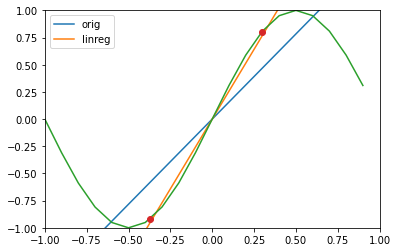

In [51]:
bandv(2)

In [10]:
np.random.uniform(1,-1,2)

array([ 0.58299753, -0.03971244])